In [1]:
import numpy as np
import pandas as pd
import pandas
# Ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Regression
import statsmodels.api as sm
from __future__ import print_function
from patsy import dmatrices
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import os
os.chdir('C:/Users/ASHISH/Desktop/SUPERVISED LEARNING-REGRESSION/30 Oct 18')

In [3]:
wine_data = pd.read_csv("Red Wine.csv")

In [4]:
wine_data.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# CORRELATION


In [5]:
wine_data.corr()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatileacidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citricacid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residualsugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
freesulfurdioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
totalsulfurdioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# BEST FIT SELECTION

In [6]:
model1 = ols('quality ~ fixedacidity + volatileacidity + citricacid + residualsugar + chlorides + freesulfurdioxide + totalsulfurdioxide + density + pH + sulphates + alcohol', data=wine_data).fit()
print(model1.summary())  #model design
aov_table = sm.stats.anova_lm(model1) #anova table
print(aov_table)
variables = model1.model.exog #Variance Inflation Factor(VIF)
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 31 Oct 2018   Prob (F-statistic):          1.79e-145
Time:                        18:12:38   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             21.9652     21

[1710538.499208099,
 7.767511565570827,
 1.7893896822284496,
 3.128022124352949,
 1.7025879081416486,
 1.4819323298036404,
 1.9630191414810472,
 2.1868127885868405,
 6.343760185732546,
 3.3297316235563725,
 1.42943374939262,
 3.0311598198178547]

In [7]:
model2 = ols('quality ~ volatileacidity + citricacid + residualsugar + chlorides + freesulfurdioxide + totalsulfurdioxide + density + pH + sulphates + alcohol', data=wine_data).fit()
print(model2.summary())
aov_table = sm.stats.anova_lm(model2)
print(aov_table)
variables = model2.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.39
Date:                Wed, 31 Oct 2018   Prob (F-statistic):          2.92e-146
Time:                        18:12:38   Log-Likelihood:                -1569.6
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1588   BIC:                             3220.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.1796     13

[687526.831930344,
 1.7849630819055546,
 2.7805565972356012,
 1.3863754802155668,
 1.4012315823815427,
 1.9392089227246467,
 2.069396444374479,
 2.430096453650389,
 1.6107751313634346,
 1.3963817651805872,
 2.1360672905376785]

In [8]:
model3 = ols('quality ~ volatileacidity +  chlorides + freesulfurdioxide + totalsulfurdioxide + pH + sulphates + alcohol', data=wine_data).fit()
print(model3.summary())
aov_table = sm.stats.anova_lm(model3)
print(aov_table)
variables = model3.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Wed, 31 Oct 2018   Prob (F-statistic):          5.32e-149
Time:                        18:12:38   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4301      0

[618.6913509860336,
 1.241819062262167,
 1.3333333165262755,
 1.8827062179469674,
 1.9439198467487837,
 1.254569649031369,
 1.321931303922078,
 1.2201574411975242]

# FORWARD SELECTION

In [9]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [10]:
model4 = forward_selected(wine_data,'quality')

In [11]:
model4

In [12]:
print(model4.rsquared_adj)  #ADJACENT_RSQUARED VALUE

0.35670601353698184


In [13]:
#DEFINING a DATASET
wine_dataX = wine_data[wine_data.columns.difference(['quality'])]
print(wine_dataX)

      alcohol  chlorides  citricacid  density  fixedacidity  \
0         9.4      0.076        0.00  0.99780           7.4   
1         9.8      0.098        0.00  0.99680           7.8   
2         9.8      0.092        0.04  0.99700           7.8   
3         9.8      0.075        0.56  0.99800          11.2   
4         9.4      0.076        0.00  0.99780           7.4   
5         9.4      0.075        0.00  0.99780           7.4   
6         9.4      0.069        0.06  0.99640           7.9   
7        10.0      0.065        0.00  0.99460           7.3   
8         9.5      0.073        0.02  0.99680           7.8   
9        10.5      0.071        0.36  0.99780           7.5   
10        9.2      0.097        0.08  0.99590           6.7   
11       10.5      0.071        0.36  0.99780           7.5   
12        9.9      0.089        0.00  0.99430           5.6   
13        9.1      0.114        0.29  0.99740           7.8   
14        9.2      0.176        0.18  0.99860          

In [14]:
wine_dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
alcohol               1599 non-null float64
chlorides             1599 non-null float64
citricacid            1599 non-null float64
density               1599 non-null float64
fixedacidity          1599 non-null float64
freesulfurdioxide     1599 non-null float64
pH                    1599 non-null float64
residualsugar         1599 non-null float64
sulphates             1599 non-null float64
totalsulfurdioxide    1599 non-null float64
volatileacidity       1599 non-null float64
dtypes: float64(11)
memory usage: 137.5 KB


# STEPWISE SELECTION

In [15]:
X=wine_dataX
y = wine_data.quality

In [16]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')

C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  alcohol                        with p-value 2.83148e-91
Add  volatileacidity                with p-value 5.55774e-45
Add  sulphates                      with p-value 2.25824e-11
Add  totalsulfurdioxide             with p-value 1.28452e-05
Add  chlorides                      with p-value 1.43219e-05
Add  pH                             with p-value 0.000182883
resulting features:


In [17]:
print(result)

['alcohol', 'volatileacidity', 'sulphates', 'totalsulfurdioxide', 'chlorides', 'pH']


# TRAINING AND TESTING || TRAINING RATIO can be taken as 80:20/75:25/70:30

In [27]:
trainwine_data=wine_data.sample(frac=0.8,random_state=200) #train data
testwine_data=wine_data.drop(trainwine_data.index)

In [19]:
trainwine_dataX = trainwine_data[trainwine_data.columns.difference(['quality'])]
X=trainwine_dataX
y = trainwine_data.quality

In [20]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  alcohol                        with p-value 4.09352e-75
Add  volatileacidity                with p-value 2.4102e-35
Add  sulphates                      with p-value 1.69107e-10
Add  totalsulfurdioxide             with p-value 0.000187808
Add  pH                             with p-value 0.000629584
Add  chlorides                      with p-value 0.000571245
resulting features:
['alcohol', 'volatileacidity', 'sulphates', 'totalsulfurdioxide', 'pH', 'chlorides']


In [22]:
columns = ['alcohol', 'volatileacidity', 'sulphates', 'totalsulfurdioxide', 'chlorides', 'pH']

In [23]:
testwine_dataX = pd.DataFrame(testwine_data,columns=columns) #testing of remaining 20% data

In [24]:
testwine_dataX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 1590
Data columns (total 6 columns):
alcohol               320 non-null float64
volatileacidity       320 non-null float64
sulphates             320 non-null float64
totalsulfurdioxide    320 non-null float64
chlorides             320 non-null float64
pH                    320 non-null float64
dtypes: float64(6)
memory usage: 17.5 KB


In [28]:
#modelfit for train
modeltrain = model95 = ols('quality ~ alcohol+volatileacidity+sulphates+totalsulfurdioxide+chlorides+pH', data=wine_data).fit()

In [26]:
modeltrain.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 31 Oct 2018   Prob (F-statistic):          7.12e-149
Time:                        18:16:15   Log-Likelihood:                -1573.4
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1592   BIC:                             3198.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.2957      0.400     10.751      0.000       3.512       5.079
alcohol                0.2907      0.017     17.291      0.000       0.258       0.324
volatileacidity       -1.0382      0.100    -10.338      0.000      -1.235      -0.841
sulphates              0.8887      0.110      8.076      0.000       0.673       1.105
totalsulfurdioxide    -0.0024      0.001     -4.684      0.000      -0.003      -0.001
chlorides             -2.0023      0.398     -5.030      0.000      -2.783      -1.221
pH                    -0.4352      0.116     -3.750      0.000      -0.663      -0.208
==============================================================================
Omnibus:                       24.314   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.645
Skew:                          -0.165   Prob(JB):                     3.00e-08
Kurtosis:                       3.642   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
from statsmodels.stats.api import anova_lm
aov_table = sm.stats.anova_lm(modeltrain)
print(aov_table) #anova table test for train wine data

                        df      sum_sq     mean_sq           F         PR(>F)
alcohol                1.0  236.294646  236.294646  561.521961  1.418581e-106
volatileacidity        1.0   94.074227   94.074227  223.554555   2.133375e-47
sulphates              1.0   19.691588   19.691588   46.794369   1.120601e-11
totalsulfurdioxide     1.0    8.217587    8.217587   19.527973   1.058359e-05
chlorides              1.0    8.036982    8.036982   19.098791   1.321525e-05
pH                     1.0    5.918882    5.918882   14.065416   1.828835e-04
Residual            1592.0  669.931191    0.420811         NaN            NaN


In [30]:
testpred =  modeltrain.predict(testwine_dataX) # prediction of test sample
print(testpred)

0       5.038672
10      5.071855
15      5.081729
17      5.332021
18      5.031694
27      5.739867
29      5.325961
52      5.433088
55      5.156004
67      5.504664
73      5.029501
76      5.682286
81      5.269037
84      5.891497
85      5.453818
89      5.015574
90      5.101239
91      6.579666
93      5.473292
94      4.791745
97      5.404010
98      5.050449
100     5.402980
102     5.190990
104     5.271201
106     5.298402
111     5.291975
128     5.896429
137     5.324467
139     5.092449
          ...   
1440    6.248748
1441    4.927780
1446    5.449818
1451    6.156369
1453    5.084741
1454    6.012415
1460    5.743086
1461    5.216300
1472    6.139441
1481    5.954787
1485    5.249985
1501    4.954562
1502    5.277917
1504    6.000751
1522    6.138600
1524    5.722667
1537    5.512396
1538    5.901778
1539    5.683467
1542    5.376089
1550    5.084905
1553    5.087624
1558    4.756110
1561    5.144730
1562    5.358511
1566    6.321133
1569    5.908332
1570    6.3426

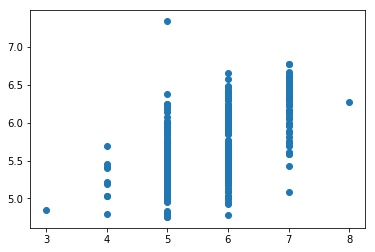

In [35]:
plt.scatter(testwine_data.quality, testpred)
plt.show()  #plot of testprediction data

In [36]:
np.mean(np.square(testwine_data.quality - testpred))  #final value i.e mean square value of the red wine data

0.4180982004207759